In [ ]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set(style="whitegrid")

In [ ]:
data_path = './movies_info.csv'
df = pd.read_csv(data_path, encoding='utf-8')

print('Data shape:', df.shape)
df.head()

Data shape: (10000, 3)


,original_title,overview,genres
0,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,"['Drama', 'Crime']"
1,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","['Drama', 'Crime']"
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,"['Drama', 'Crime']"
3,Schindler's List,The true story of how businessman Oskar Schind...,"['Drama', 'History', 'War']"
4,12 Angry Men,The defense and the prosecution have rested an...,['Drama']


In [ ]:
print('Dataset Info:')
df.info()

print('\nMissing values per column:')
print(df.isnull().sum())

str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

df.fillna({'overview': 'No overview provided', 'genres': 'Unknown'}, inplace=True)

df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  10000 non-null  object
 1   overview        9999 non-null   object
 2   genres          10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB

Missing values per column:
original_title    0
overview          1
genres            0
dtype: int64


,original_title,overview,genres
0,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,"['Drama', 'Crime']"
1,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","['Drama', 'Crime']"
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,"['Drama', 'Crime']"
3,Schindler's List,The true story of how businessman Oskar Schind...,"['Drama', 'History', 'War']"
4,12 Angry Men,The defense and the prosecution have rested an...,['Drama']


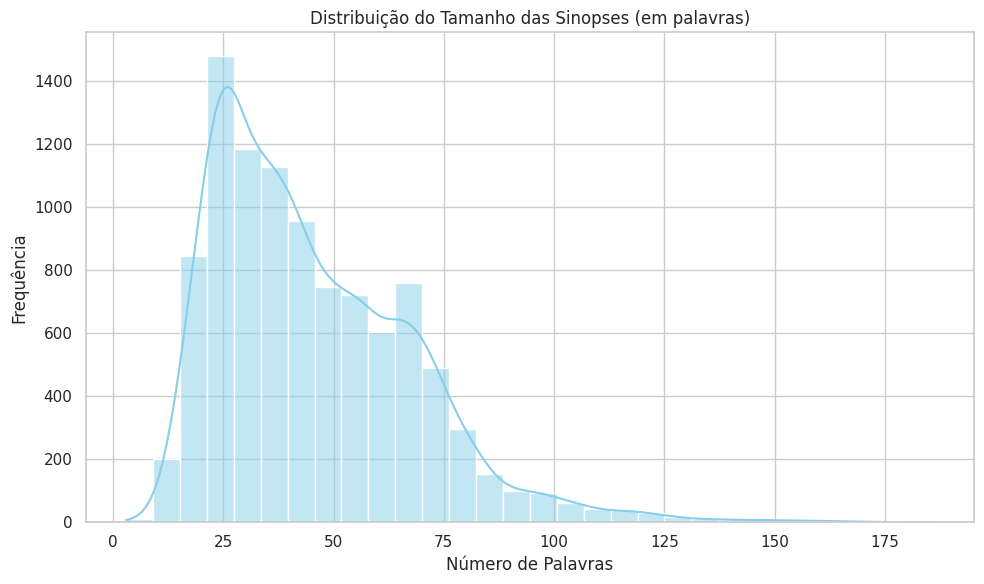

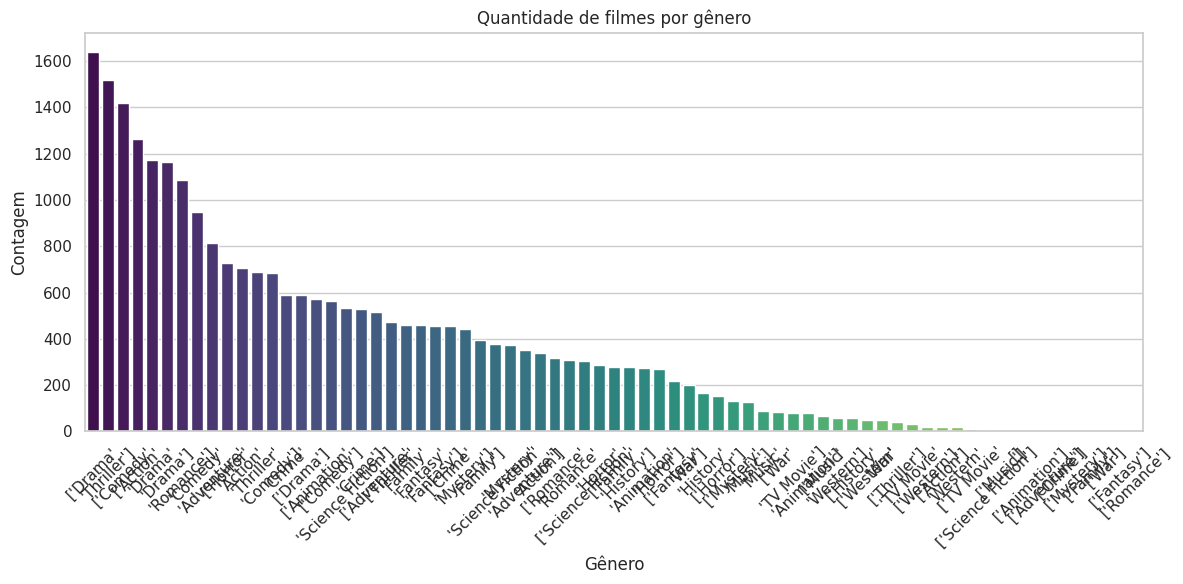

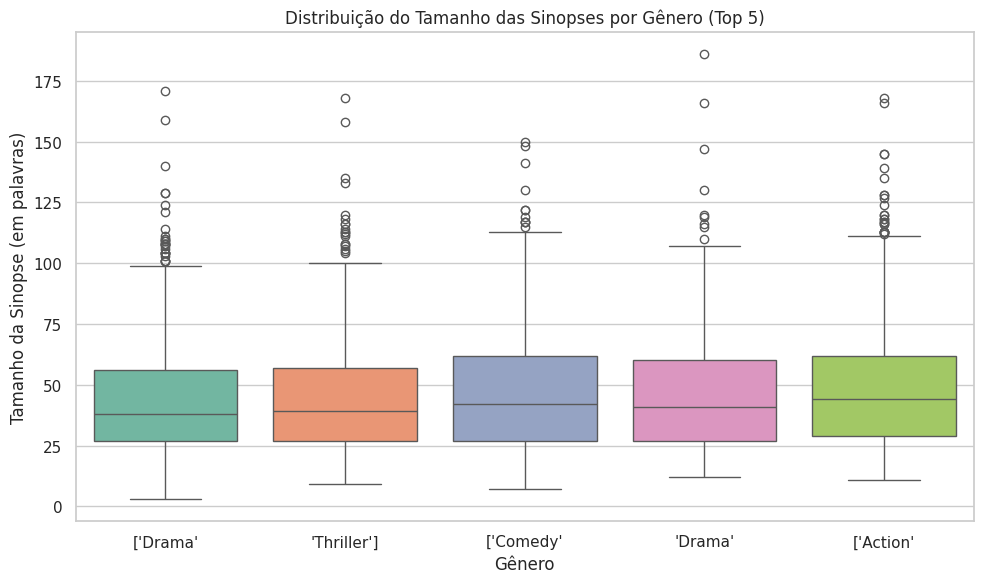

In [ ]:
df['overview_length'] = df['overview'].apply(lambda x: len(x.split()))
df['title_length'] = df['original_title'].apply(lambda x: len(x.split()))

def split_genres(genres_str):
    if pd.isnull(genres_str) or genres_str.lower() == 'unknown':
        return []
    return [g.strip() for g in genres_str.split(',')]

df['genres_list'] = df['genres'].apply(split_genres)

df_exploded = df.explode('genres_list')

plt.figure(figsize=(10,6))
sns.histplot(df['overview_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição do Tamanho das Sinopses (em palavras)')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df_exploded, x='genres_list', order=df_exploded['genres_list'].value_counts().index, palette='viridis')
plt.title('Quantidade de filmes por gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_genres = df_exploded['genres_list'].value_counts().head(5).index.tolist()
subset = df_exploded[df_exploded['genres_list'].isin(top_genres)]

plt.figure(figsize=(10,6))
sns.boxplot(x='genres_list', y='overview_length', data=subset, palette='Set2')
plt.title('Distribuição do Tamanho das Sinopses por Gênero (Top 5)')
plt.xlabel('Gênero')
plt.ylabel('Tamanho da Sinopse (em palavras)')
plt.tight_layout()
plt.show()

